<a href="https://colab.research.google.com/github/Chinmay-47/EnsembleML_Udemy/blob/master/Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sample mean of X: -0.014135622696992362
bootstrap mean of X: -0.007575609553066298


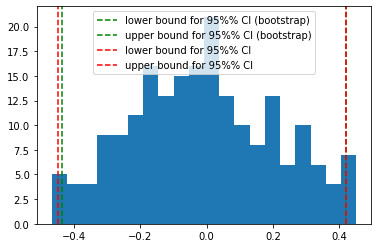

In [1]:
from __future__ import print_function, division
from builtins import range, input
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t


B = 200
N = 20
X = np.random.randn(N)

print("sample mean of X:", X.mean())

individual_estimates = np.empty(B)
for b in range(B):
  sample = np.random.choice(X, size=N)
  individual_estimates[b] = sample.mean()


bmean = individual_estimates.mean()
bstd = individual_estimates.std()
lower = bmean + norm.ppf(0.025)*bstd # norm.ppf(0.025) == -1.96
upper = bmean + norm.ppf(0.975)*bstd # norm.ppf(0.975) == +1.96

# traditional way of calculating CI
lower2 = X.mean() + norm.ppf(0.025)*X.std()/np.sqrt(N)
upper2 = X.mean() + norm.ppf(0.975)*X.std()/np.sqrt(N)

print("bootstrap mean of X:", bmean)

plt.hist(individual_estimates, bins=20)
plt.axvline(x=lower, linestyle='--', color='g', label="lower bound for 95%% CI (bootstrap)")
plt.axvline(x=upper, linestyle='--', color='g', label="upper bound for 95%% CI (bootstrap)")
plt.axvline(x=lower2, linestyle='--', color='r', label="lower bound for 95%% CI")
plt.axvline(x=upper2, linestyle='--', color='r', label="upper bound for 95%% CI")
plt.legend()
plt.show()